<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Notebooks/05-1-Evaluacion-de-Modelos-Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Evaluación de modelos - Clasificación
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; Periodo 2025-02
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

Este cuaderno está diseñado como una guía introductoria para la evaluación de modelos de aprendizaje automático. En él se presentan los conceptos básicos de evaluación de modelos, así como las métricas más comunes para evaluar la calidad de los modelos de clasificación.


Los paquetes necesarios son:

In [1]:
# Paquetes necesarios
import numpy as np # Para manejo de arreglos
import pandas as pd  # Para manejo de datos estructurados
import matplotlib.pyplot as plt # Para visualización
import seaborn as sns # Para visualización
# Modelos de clasificación
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# Curva ROC
from sklearn.metrics import roc_curve, roc_auc_score

---
## <font color='264CC7'> Modelos de clasificación </font>


Utilicemos datos ficticios:

In [31]:
np.random.seed(0)
y_true = np.random.choice([0, 1], size=100, p=[0.5, 0.5])
y_pred = np.random.choice([0, 1], size=100, p=[0.5, 0.5])

# Crear un DataFrame
df = pd.DataFrame({
    'y_true': y_true,
    'y_pred': y_pred
})

# Mostrar los datos
display(df)

,y_true,y_pred
0,1,1
1,1,0
2,1,1
3,1,1
4,0,0
...,...,...
95,0,0
96,1,0
97,0,0
98,1,0


Generamos la matriz de confusión:

In [32]:
# Matriz de confusión
cm = confusion_matrix(y_true, y_pred)
print('Matriz de confusión')
print(cm)

Matriz de confusión
[[24 27]
 [19 30]]


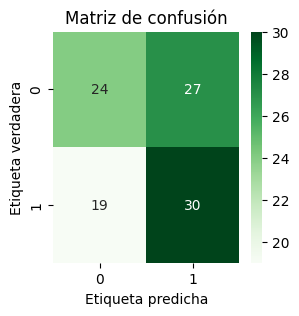

In [33]:
# Visualizar la matriz de confusión
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Matriz de confusión')
plt.ylabel('Etiqueta verdadera')
plt.xlabel('Etiqueta predicha')
plt.show()

Calculamos las métricas de evaluación:

In [34]:
# Métricas de clasificación
acc = accuracy_score(y_true, y_pred)
pre = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
f1s = f1_score(y_true, y_pred)

print(f'Exactitud: {acc:.2f}')
print(f'Precisión: {pre:.2f}')
print(f'Recall: {rec:.2f}')
print(f'F1-score: {f1s:.2f}')


Exactitud: 0.54
Precisión: 0.53
Recall: 0.61
F1-score: 0.57


---

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Aumenta el conjunto de datos con más muestras y observa cómo cambian las métricas de evaluación.
</div>

---

### <font color='264CC7'> Curva ROC </font>

Consideremos que tenemos un modelo que nos proporciona la probabilidad de pertenecer a un grupo.

In [35]:
np.random.seed(0)
y_true = np.random.choice([0, 1], size=100, p=[0.5, 0.5])
y_pred = np.random.rand(100)

# Crear un DataFrame
df = pd.DataFrame({
    'y_true': y_true,
    'y_pred': y_pred
})

# Mostrar los datos
display(df.head())


,y_true,y_pred
0,1,0.677817
1,1,0.270008
2,1,0.735194
3,1,0.962189
4,0,0.248753


Para decir la pertenencia, se toma un umbral.

In [43]:
# Selección de umbrales
threshold = 0.2

# Convertir las probabilidades en etiquetas
y_pred_threshold = y_pred >= threshold

# Crear un DataFrame
df = pd.DataFrame({
    'y_true': y_true,
    'y_pred': y_pred_threshold
})

# Mostrar los datos
display(df.head())


# Matriz de confusión
cm = confusion_matrix(y_true, y_pred_threshold)
print('Matriz de confusión')
print(cm)

,y_true,y_pred
0,1,True
1,1,True
2,1,True
3,1,True
4,0,True


Matriz de confusión
[[10 41]
 [ 6 43]]


Calculamos la métricas de evaluación:

In [44]:
# Métricas de clasificación
TPR = recall_score(y_true, y_pred_threshold)
FPR = 1 - recall_score(y_true, y_pred_threshold, pos_label=0)

print(f'Tasa de verdaderos positivos: {TPR:.2f}')
print(f'Tasa de falsos positivos: {FPR:.2f}')


Tasa de verdaderos positivos: 0.88
Tasa de falsos positivos: 0.80


Umbral 0:
Tasa de verdaderos positivos: 1.00
Tasa de falsos positivos: 1.00


Umbral 0.2:
Tasa de verdaderos positivos: 0.88
Tasa de falsos positivos: 0.80

---

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Cambia el umbral y calcula las nuevas métricas de evaluación. Observa cómo varían. Apunta algunos datos para diferentes umbrales y luego colócalos en un plano cartesiano (FPR vs TPR).
</div>

---

Con estos valores, podemos graficar la curva ROC.

Text(0, 0.5, 'Tasa de verdaderos positivos')

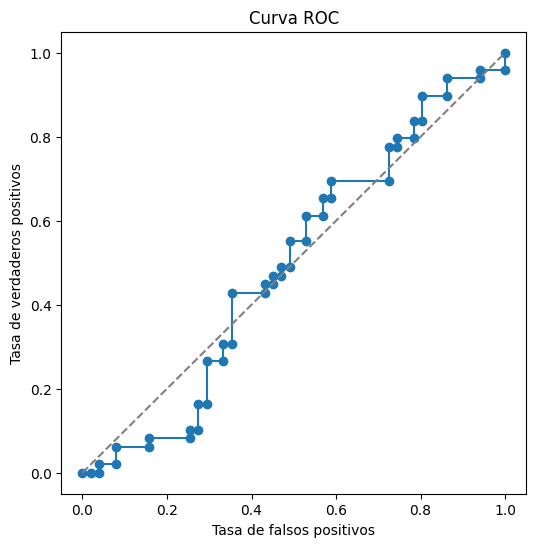

In [ ]:
FPR, TPR, thresholds = roc_curve(y_true, y_pred)

# Visualizar la curva ROC
plt.figure(figsize=(6, 6))
plt.plot(FPR, TPR, marker='o')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Curva ROC')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')

A continuación, un ejemplo más realista.

Text(0, 0.5, 'Tasa de verdaderos positivos')

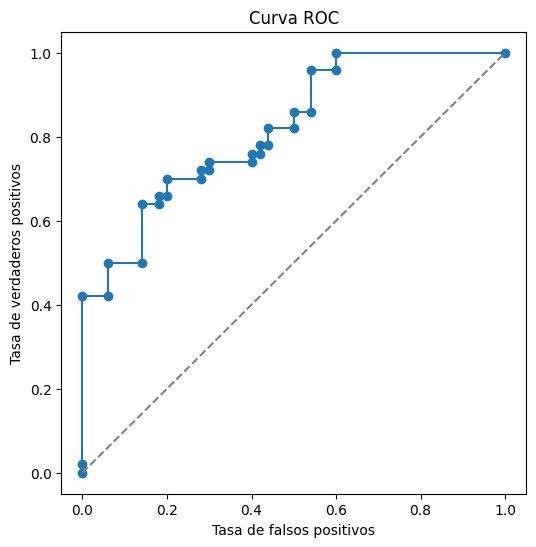

In [ ]:
y_true = np.random.choice([0, 1], size=100, p=[0.5, 0.5])
y_pred = [y + 3*np.random.rand()/4 if y == 0 else y - 3*np.random.rand()/4 for y in y_true]

FPR, TPR, thresholds = roc_curve(y_true, y_pred)

# Visualizar la curva ROC
plt.figure(figsize=(6, 6))
plt.plot(FPR, TPR, marker='o')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Curva ROC')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')

Con esto, calculamos el área bajo la curva ROC.

In [ ]:
# Calcular el área bajo la curva ROC
roc_auc = roc_auc_score(y_true, y_pred)
print(f'Área bajo la curva ROC: {roc_auc:.2f}')

Área bajo la curva ROC: 0.82
